In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
traces_data = pd.read_csv(r"traces_data.csv")

In [3]:
traces_data.head()

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
0,42:32.7,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,NaN,featureflagservice,/,887477
1,42:32.7,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634
2,42:33.9,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,NaN,frontend-proxy,ingress,213000
3,42:36.9,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,NaN,frontend-proxy,ingress,602000
4,42:39.9,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,NaN,frontend-proxy,ingress,556000


 Columns details:
- Timestamp: Time of occurrence of the event
- traceID: Unique ID of an execution path through the system
- spanID: Unique ID associated with execution of a logical unit
- parentSpanID: spanID of parent span that called a given span
- serviceName: Name of microservice associated with the span
- Name: Method/function/endpoint name associated with the span
- durationNano: Time taken in nanoseconds to execute the span

In [4]:
traces_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183615 entries, 0 to 183614
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Timestamp     183615 non-null  object
 1   traceID       183615 non-null  object
 2   spanID        183615 non-null  object
 3   parentSpanID  141834 non-null  object
 4   serviceName   183615 non-null  object
 5   Name          183615 non-null  object
 6   durationNano  183615 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 9.8+ MB


In [18]:
traces_data.describe()

,durationNano
count,1.836150e+05
mean,5.414918e+06
std,2.077879e+07
min,0.000000e+00
25%,3.357000e+05
50%,1.584906e+06
75%,6.832718e+06
max,4.999858e+09


In [35]:
print("Number of Unique Service Name: ",len(traces_data.serviceName.unique()))

Number of Unique Service Name:  17


In [20]:
print("Number of Unique Endpoint: ",len(traces_data.Name.unique()))

Number of Unique Endpoint:  66


In [7]:
print("Following are Top Twenty Endpoints/Method used:")
print(traces_data.Name.value_counts()[:20])

Following are Top Twenty Endpoints/Method used:
HTTP GET                                          41311
oteldemo.ProductCatalogService/GetProduct         19453
grpc.oteldemo.ProductCatalogService/GetProduct    15741
HTTP POST                                         12938
HGET                                               8440
oteldemo.CartService/GetCart                       6476
/oteldemo.FeatureFlagService/GetFlag               5010
ingress                                            4836
grpc.oteldemo.CartService/GetCart                  4462
HMSET                                              3975
EXPIRE                                             3975
featureflagservice.repo.query:featureflags         3809
oteldemo.CartService/AddItem                       2971
grpc.oteldemo.CartService/AddItem                  2970
oteldemo.CurrencyService/Convert                   2853
CurrencyService/Convert                            2853
fs statSync                                        2640


In [40]:
print("Following are Top Twenty Services used:")
print(traces_data.serviceName.value_counts()[:20])

Following are Top Twenty Services used:
frontend                 65758
cartservice              25834
productcatalogservice    20934
loadgenerator            16852
checkoutservice          13750
featureflagservice        7623
recommendationservice     6032
frontend-proxy            4836
emailservice              4016
adservice                 3523
paymentservice            3337
shippingservice           3012
quoteservice              3010
currencyservice           2860
accountingservice         1004
frauddetectionservice     1004
frontend-web               230
Name: serviceName, dtype: int64


In [80]:
top_services = traces_data.serviceName.value_counts().reset_index() # resetting index for making a table 
top_services.columns = ['Service_Name', 'Count']

In [81]:
print(top_services)

             Service_Name  Count
0                frontend  65758
1             cartservice  25834
2   productcatalogservice  20934
3           loadgenerator  16852
4         checkoutservice  13750
5      featureflagservice   7623
6   recommendationservice   6032
7          frontend-proxy   4836
8            emailservice   4016
9               adservice   3523
10         paymentservice   3337
11        shippingservice   3012
12           quoteservice   3010
13        currencyservice   2860
14      accountingservice   1004
15  frauddetectionservice   1004
16           frontend-web    230


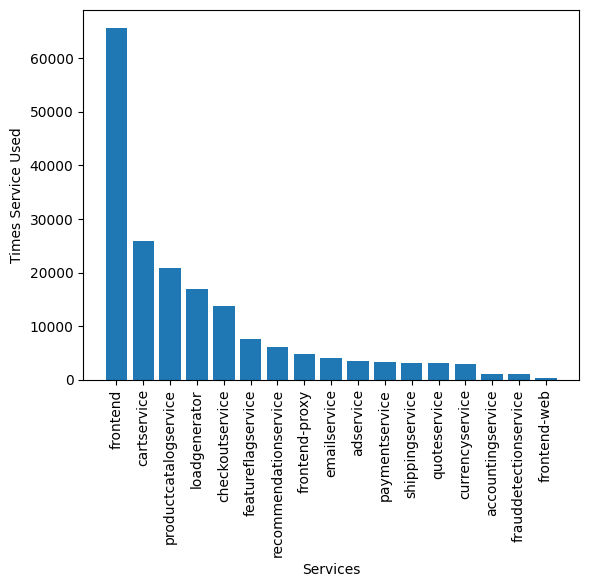

In [97]:
plt.bar(top_services.Service_Name, top_services.Count)
plt.xlabel('Services')
plt.ylabel('Times Service Used')
plt.xticks(rotation = 90)
plt.show()

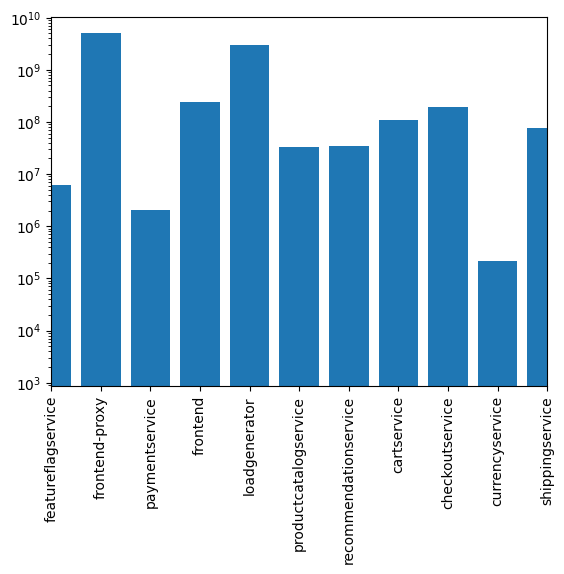

In [4]:
plt.bar(traces_data.serviceName, traces_data.durationNano)
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.xlim(0, 10)
plt.xticks(rotation=90)
plt.show()


In [10]:
top_methods = traces_data.Name.value_counts().head(10).reset_index() # resetting index for making a table 
top_methods.columns = ['Method_Name', 'Count']

In [11]:
top_methods

,Method_Name,Count
0,HTTP GET,41311
1,oteldemo.ProductCatalogService/GetProduct,19453
2,grpc.oteldemo.ProductCatalogService/GetProduct,15741
3,HTTP POST,12938
4,HGET,8440
5,oteldemo.CartService/GetCart,6476
6,/oteldemo.FeatureFlagService/GetFlag,5010
7,ingress,4836
8,grpc.oteldemo.CartService/GetCart,4462
9,HMSET,3975


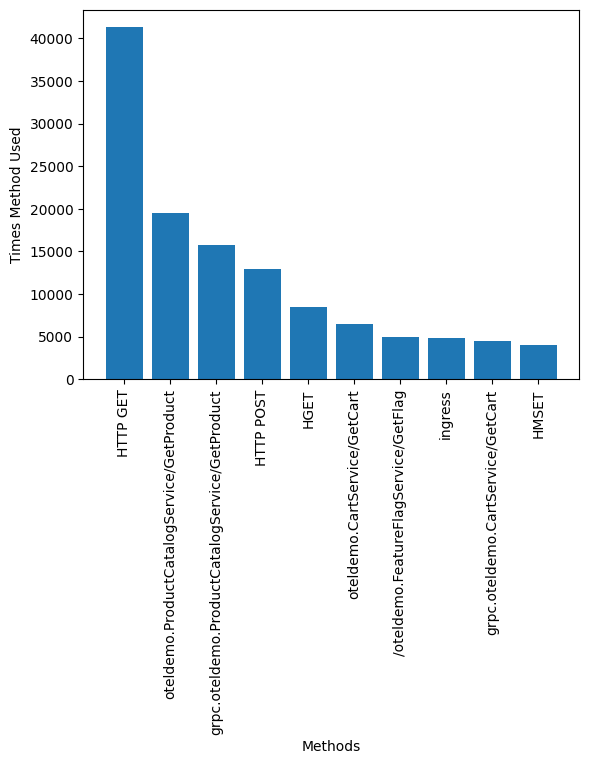

In [13]:
plt.bar(top_methods.Method_Name, top_methods.Count)
plt.xlabel('Methods')
plt.ylabel('Times Method Used')
plt.xticks(rotation = 90)
plt.show()

In [14]:
# Aggregate Duration by Method
total_duration_by_method = traces_data.groupby('Name')['durationNano'].sum().reset_index()
total_duration_by_method = total_duration_by_method.sort_values(by='durationNano', ascending=False)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15880\4292353126.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(total_duration_by_method['Name'][:10], total_duration_by_method['durationNano'][:10])


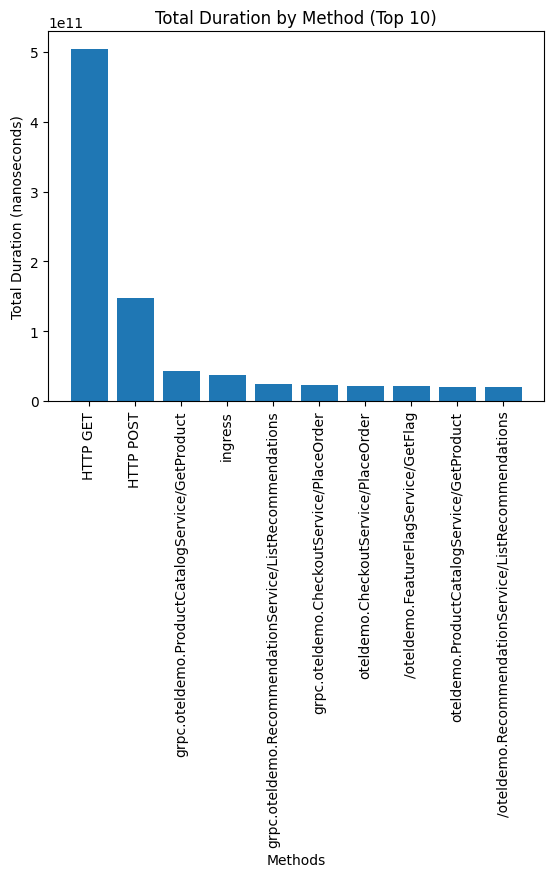

In [29]:

# Visualize Total Duration for Methods
plt.bar(total_duration_by_method['Name'][:10], total_duration_by_method['durationNano'][:10])
plt.xlabel('Methods')
plt.ylabel('Total Duration (nanoseconds)')
plt.title('Total Duration by Method (Top 10)')
plt.xticks(rotation=90)
plt.show()


In [16]:

# Aggregate Duration by Service
total_duration_by_service = traces_data.groupby('serviceName')['durationNano'].sum().reset_index()
total_duration_by_service = total_duration_by_service.sort_values(by='durationNano', ascending=False)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15880\4190578202.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(total_duration_by_service['serviceName'][:10], total_duration_by_service['durationNano'][:10])


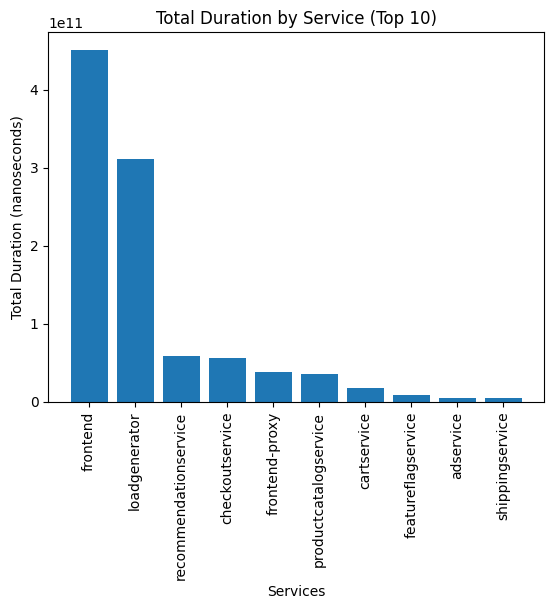

In [28]:

# Visualize Total Duration for Services
plt.bar(total_duration_by_service['serviceName'][:10], total_duration_by_service['durationNano'][:10])
plt.xlabel('Services')
plt.ylabel('Total Duration (nanoseconds)')
plt.title('Total Duration by Service (Top 10)')
plt.xticks(rotation=90)
plt.show()


# Which Algorithm we can use to detect anomalies?
## We can use Isolation Forest Algorithm because of following reasons:
- Fast Execution 
- Efficiency with High Dimentational Data
- Low False Positive
- Independence From Normalizaton